<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-Plots" data-toc-modified-id="Basic-Plots-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic Plots</a></span></li><li><span><a href="#Scatter-(2D)-plots" data-toc-modified-id="Scatter-(2D)-plots-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scatter (2D) plots</a></span><ul class="toc-item"><li><span><a href="#Simple-scatter-with-colors" data-toc-modified-id="Simple-scatter-with-colors-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simple scatter with colors</a></span></li><li><span><a href="#Scatter-plot-with-colors-and-symbols" data-toc-modified-id="Scatter-plot-with-colors-and-symbols-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Scatter plot with colors and symbols</a></span></li></ul></li><li><span><a href="#Seaborn" data-toc-modified-id="Seaborn-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Seaborn</a></span><ul class="toc-item"><li><span><a href="#Boxplot" data-toc-modified-id="Boxplot-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Boxplot</a></span></li><li><span><a href="#Density-Plots" data-toc-modified-id="Density-Plots-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Density Plots</a></span></li><li><span><a href="#Violin-plot(distribution)" data-toc-modified-id="Violin-plot(distribution)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Violin plot(distribution)</a></span></li><li><span><a href="#Pairwise-scatter-plots" data-toc-modified-id="Pairwise-scatter-plots-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Pairwise scatter plots</a></span></li></ul></li></ul></div>

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Basic Plots

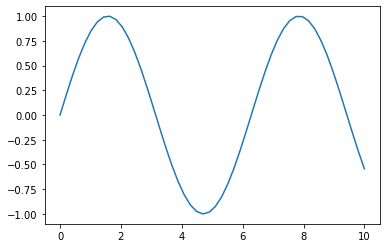

In [2]:
x = np.linspace(0, 10, 50)
sines = np.sin(x)

plt.plot(x, sines)
plt.show()

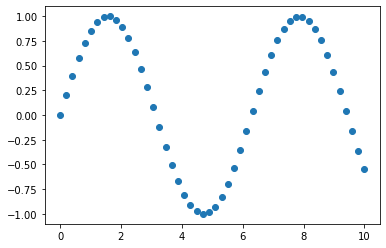

In [3]:
plt.plot(x, sines, "o")
plt.show()
# use plt.plot to get color / marker abbreviations

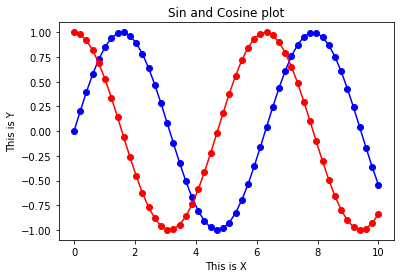

In [4]:
# Rapid multiplot
cosines = np.cos(x)
plt.plot(x, sines, "-b", x, sines, "ob", x, cosines, "-r", x, cosines, "or")
plt.xlabel("This is X")
plt.ylabel("This is Y")
plt.title("Sin and Cosine plot")
plt.show()

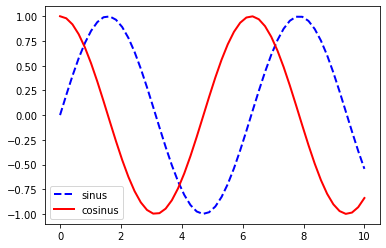

In [5]:
# Step by step
plt.plot(x, sines, label='sinus', color='blue',             linestyle='--', linewidth=2)

plt.plot(x, cosines, label='cosinus', color='red', linestyle='-', linewidth=2)
plt.legend()
plt.show()


# Scatter (2D) plots

In [6]:
try:
    salary = pd.reat("../datasets/salary_table.csv")
except:
    url = 'https://raw.githubusercontent.com/neurospin/pystatsml/master/datasets/salary_table.csv'

salary = pd.read_csv(url)
df = salary

## Simple scatter with colors

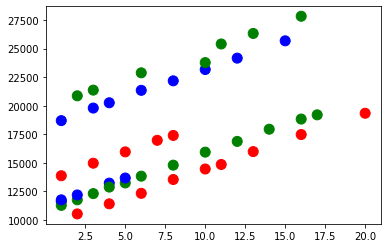

In [7]:
colors = colors_edu = {"Bachelor": "r",'Master':'g', 'Ph.D':'blue'}
plt.scatter(df['experience'], df['salary'], c=df['education'].apply(lambda x: colors[x]), s=100)
plt.show()

## Scatter plot with colors and symbols

In [8]:
# list(salary.groupby(['education', 'management']))

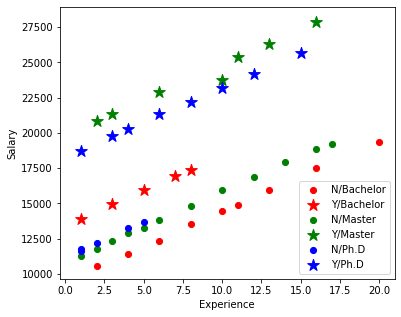

In [9]:
plt.figure(figsize=(6, 5))

symbols_manag = dict(Y="*", N=".")
colors_edu = {'Bachelor':'r', 'Master':'g', 'Ph.D':'b'}

## group by education x management => 6 groups
for values, d in salary.groupby(['education', 'management']):
    edu, manager = values
    # print(values, d)
    plt.scatter(d['experience'], d['salary'], marker=symbols_manag[manager], color=colors_edu[edu], s=150,  label=manager+"/"+edu)


## Set labels
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend(loc=4) # lower right
plt.show()

# Seaborn

* [Plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial)
* [Visualizing the distribution of a dataset](https://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial)

## Boxplot

Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution


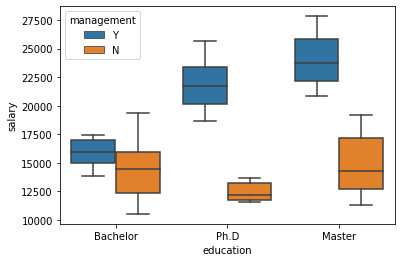

In [10]:
sns.boxplot(x='education', y='salary', hue='management', data=salary)
plt.show()

# https://datascience.stackexchange.com/questions/46117/meaning-of-hue-in-seaborn-barplot

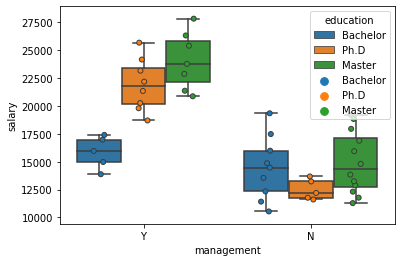

In [11]:
sns.boxplot(x="management", y="salary", hue="education", data=salary)
sns.stripplot(x="management", y="salary", hue="education", data=salary, jitter=True, dodge=True, linewidth=1)
plt.show()

## Density Plots

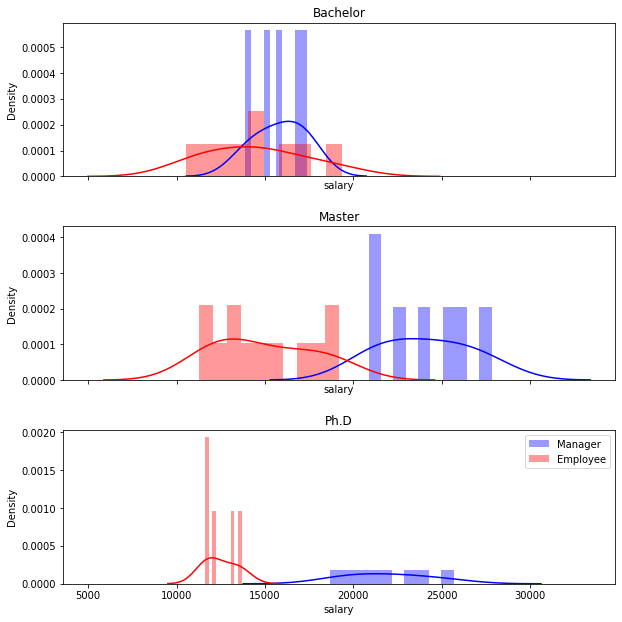

In [12]:
# list(salary.groupby(['education']))

f, axes = plt.subplots(3, 1, figsize=(9, 9), sharex=True)

i = 0

for edu, d in salary.groupby(['education']):
    sns.distplot(d.salary[d.management == 'Y'], color='b', bins=10, label="Manager", ax=axes[i])
    sns.distplot(d.salary[d.management == "N"], color='r', bins=10, label="Employee", ax=axes[i])
    axes[i].set_title(edu)
    axes[i].set_ylabel("Density")
    i += 1

plt.tight_layout(pad=2.0)
ax = plt.legend()
plt.show()

## Violin plot(distribution)

Combines a boxplot with the kernel density estimation procedure

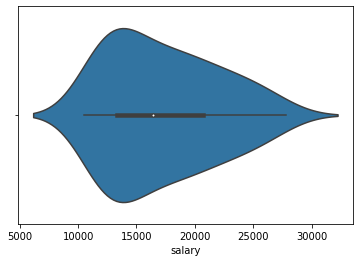

In [13]:
ax = sns.violinplot(x="salary", data=salary)
# https://www.geeksforgeeks.org/violin-plot-for-data-analysis

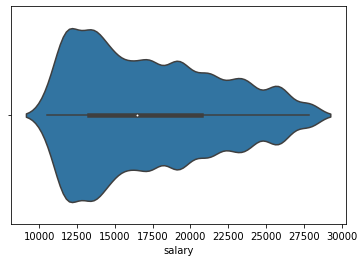

In [14]:
ax = sns.violinplot(x="salary", data=salary, bw=.15)

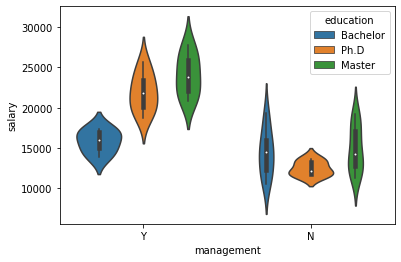

In [15]:
ax = sns.violinplot(x="management", y="salary", hue="education", data=salary)

In [16]:
# tips dataset

In [17]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


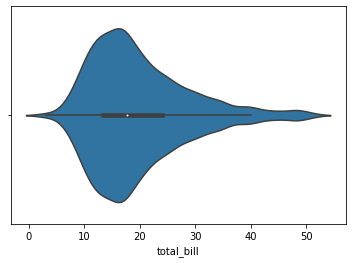

In [18]:
ax = sns.violinplot(x=tips["total_bill"], bw=.2)

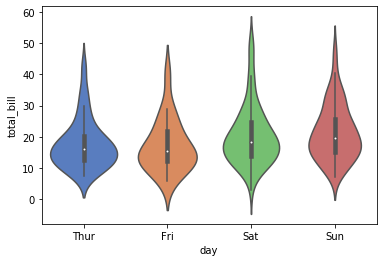

In [19]:
# group by day

ax = sns.violinplot(x="day", y="total_bill", data=tips, palette="muted")

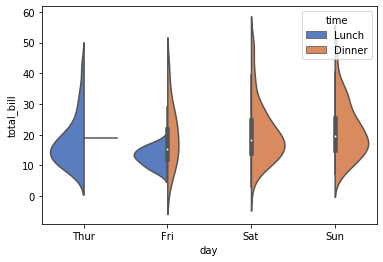

In [20]:
# Group by day and color by time (lunch vs dinner)

ax = sns.violinplot(x="day", y="total_bill", hue="time", data=tips, palette="muted", split=True)


## Pairwise scatter plots

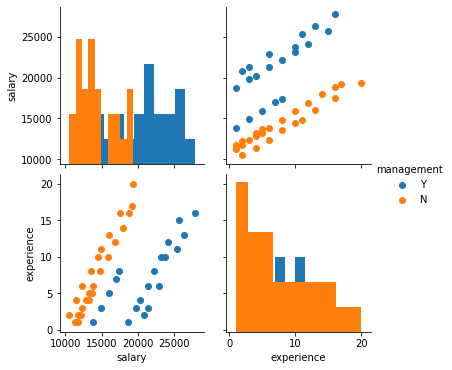

In [21]:
g = sns.PairGrid(salary, hue='management')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
ax = g.add_legend()